#Métodos de interpolación

##Interpolación de Lagrange
En nuestro primer programa realizamos la interpolación de lagrange de unos datos aleatorios
la interpolación esta definida  como el siguiente sumatorio:

$P_{n}\left( x\right) =\sum ^{n}_{i=0}S\left( x_{i}\right) l_{in}\left( x\right)$


Datos xi
[0.86690908 0.37677812 0.11671721 0.82531016 0.16843378 0.61997654]
Datos yi
[0.50811459 0.68983983 0.86346016 0.15295815 0.86791287 0.72106907]
Otros Datos
Datos xi
[0.66370172 0.82805872 0.02377124 0.65315924 0.03525648 0.42415286]
Datos cosh xi
[1.22845465 1.36288384 1.00028255 1.22100058 1.00062157 1.09130952]


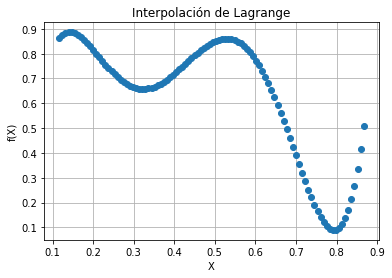

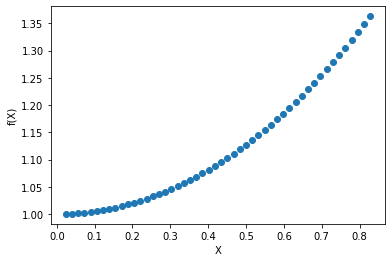

In [1]:
import numpy as np #importamos numpy
import matplotlib.pyplot as plt #importamos pyplot de modulo matplotlib

#Introducimos seis valores aleatorios
datax=np.random.rand(6) #Datos de Xi
datay=np.random.rand(6) #Datos de Yi
#Introducimos un otros arrays de datos para hacer otra la grafica
datax2=np.random.rand(6)
datay2=np.cosh(datax2)
#Cabecera para ver los  valores aleatorios
print("Datos xi")
print(datax)
print("Datos yi")
print(datay)
print("Otros Datos")
print("Datos xi")
print(datax2)
print("Datos cosh xi")
print(datay2)
#Definimos la interpolacion de Lagrange
def LAGRANGE(a,x,y):
    n=len(x)
    p=0  #valor inicial del polinomio
    for j in range (n):
        l=1 #valor incial del cociente 
        for k in range (n):
            if k != j:
                l=l*((a-x[k])/(x[j]-x[k])) #Cocientes de Lagrange
        p+=l*y[j] #polinomio interpolador
    return p #devuelve el polinomio
  
t=np.linspace(min(datax),max(datax),100) #Espacio lineal con 100 puntos 
t2=np.linspace(min(datax2),max(datax2),50)
yl=LAGRANGE(t,datax,datay) #Funcion evaluada con los datos de Xi,Yi
yl2=LAGRANGE(t2,datax2,datay2)
#Grafica del polinomio
plt.figure(num=1)
plt.plot(t,yl,"o") #Dibujamos la grafica
plt.title("Interpolación de Lagrange") #Titulo de a grafica
plt.ylabel('f(X)') #Etiqueta eje x
plt.xlabel('X')  #Etiqueta eje y
plt.grid(True) 
plt.figure(num=2)
plt.plot(t2,yl2,"o")
plt.ylabel("f(X)")
plt.xlabel("X")
plt.show() #Mostramos la grafica.



##Interpolación de Newton
Continuamos nuestro programa con la interpolación de Newton este método esta definido  como:

$p_n\left( x\right) =p_{n-1}\left( x\right) +f\left[ x_{n},\ldots ,x_{0}\right] \cdot \prod ^{n-1}_{i=0}\left( x-x_{i}\right)$


Donde  $f\left[ x_{n},\ldots ,x_{0}\right] \ $ son las diferencias divididas  y  $p_{n-1}\left( x\right) $ es el polinomio resultado de la iteración anterior.

In [0]:
#Utilizamos las variables aleatorias del ejercicio anterior.


def NEWTONCOEFF(x,y): #Definimos los coeficientes de Newton
    m = len(x)
    x=np.copy(x)
    a=np.copy(y)
    for k in range(1,m):
      a[k:m] = (a[k:m] - a[k-1])/(x[k:m] - x[k-1]) #Diferencias divididas
    return a #Devuelve los coeficientes
"""

def NEWTON(a,x,y): #Definimos la interpolacion de Newton
    l=NEWTONCOEFF(x,y)
    n=len(x)-1
    p=l[n]
    for k in range(1,n+1):
        p = l[n-k] + (a -x[n-k])*p #Polinomio de Newton
    return p #Devuelve el polinomio interpolador

"""

def NEWTON(a,x,y):
    n=len(x)
    p=np.zeros([n,n+1])
    dd=np.zeros([n+1])
    for m in range(n):
        p[m,0]=x[m]
        p[m,1]=y[m]
    for i in range(2,n+1): 
      for j in range(n+1-i):
           p[j,i]=(p[j+1,i-1]-p[j,i-1])/(x[j+i-1]-x[j])
           dd=p[i-1,i-1]
    for k in range(1,n+1):
        dd = p[n-k] + (a -x[n-k])*dd #Polinomio de Newton
    return dd #Devuelve el polinomio interpolador
     
            

def LAGRANGE(a,x,y):
    n=len(x)
    p=0  #valor inicial del polinomio
    for j in range (n):
        l=1 #valor incial del cociente 
        for k in range (n):
            if k != j:
                l=l*((a-x[k])/(x[j]-x[k])) #Cocientes de Lagrange
        p+=l*y[j] #polinomio interpolador
    return p #devuelve el polinomio



yn=NEWTON(t,datax,datay) #Interpolacion evaluada con los datos de Xi,Yi
yn2=NEWTON(t2,datax2,datay2)

#Grafica del polinomio
plt.figure(num=1)
plt.plot(t,yn,"o",color="r") 
plt.title("Interpolación de Newton")
plt.ylabel('f(X)') #Etiqueta eje y
plt.xlabel('X') #Etiqueta eje x
plt.grid(True)
plt.figure(num=2)
plt.plot(t2,yn2,"o",color="r")
plt.ylabel("f(X)")
plt.xlabel("X")
plt.show() #Mostramos la grafica



      
      
  
 

ValueError: ignored

##Error en la interpolación de Lagrange y Netwon

Finalmente calculamos el error en la interpolación que viene dado por:

$e\left( x\right) =f\left( x\right) -p_{n}\left( x\right)=\dfrac {\left( x-x_{0}\right) \left( x-x\cdot \right) \ldots \left( x-x_{n}\right) }{\left( 1+\eta \right) !} f^{\left( n+1\right) }_{\left( \xi x\right) }$

Donde aproximamos la derivada de orden $m=n+1$ por diferencias divididas:

$\left[ x_{m},\ldots ,x_{0}\right] =\dfrac{ f^{\left( m\right) }_{\left( \xi \right) }}{\left( m\right) !}$

 


In [0]:
#Definimos el error en la interpolación
def ERRORINT(a,x,y):
  m=len(x)
  print(m)
  l=1.
  coeff=NEWTONCOEFF(x,y)
  print(coeff)
  for k in range(0,m):
    l=l*(a-x[k-1]) #Diferencias divididas
    e=coeff[k]*l #Coeficientes del error
  return e #Devuelve el error de interpolacion
 
ye=ERRORINT(t,datax,datay) #Error a partir de las xi y yi
ye2=ERRORINT(t2,datax2,datay2)
yed=np.cosh(t2)-(yn2)
#Grafica del error
plt.figure(num=1)
plt.plot(t,ye,"o",color="g")
plt.title("Error en la interpolación")
plt.xlabel("X") #Etiqueta eje X
plt.ylabel("e(X)") #Etiqueta eje Y
plt.grid(True)  #Mostramos la grafica
plt.show()
plt.figure(num=2)
plt.plot(t2,ye2,"o",color="g")
plt.title("Diferencias divididas")
plt.figure(num=3)
plt.title("Diferencia entre la función")
plt.plot(t2,yed,"o",color="g")

6


NameError: ignored